# Relatorio V

1. Tratar erros de dados ausentes.
2. Transformar a variável Name em uma variável categorica.
3. Criar uma variárvel categorica com base no sumário estatíticos da variável Calories.

In [1]:
import pandas as pd

In [116]:
df_data = pd.read_csv(
    "arquivos_gerados/dados_aula04.csv",
    index_col="Unnamed: 0"
)

In [117]:
df_data.head(2)

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin,Datas
0,Robert,1,60,110,130,409.1,33.3,6.8,01/11/2023
1,Mark,1,60,117,145,479.0,103.2,8.0,02/11/2023


In [118]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         169 non-null    object 
 1   Week         169 non-null    int64  
 2   Duration     169 non-null    int64  
 3   Pulse        169 non-null    int64  
 4   Maxpulse     169 non-null    int64  
 5   Calories     164 non-null    float64
 6   DMediaGeral  164 non-null    float64
 7   CalsPerMin   164 non-null    float64
 8   Datas        169 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 13.2+ KB


In [119]:
df_data.columns

Index(['Name', 'Week', 'Duration', 'Pulse', 'Maxpulse', 'Calories',
       'DMediaGeral', 'CalsPerMin', 'Datas'],
      dtype='object')

In [98]:
df_data = df_data[['Datas', 'Week', 'Name', 'Duration', 'Pulse', 'Maxpulse', 'Calories',
       'DMediaGeral', 'CalsPerMin']]

In [99]:
df_data.head(2)

,Datas,Week,Name,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
0,01/11/2023,1,Robert,60,110,130,409.1,33.3,6.8
1,02/11/2023,1,Mark,60,117,145,479.0,103.2,8.0


In [100]:
# 1. Tratar erros de dados ausentes.

In [101]:
# isna
# isnull
df_data.isna().sum()

Datas          0
Week           0
Name           0
Duration       0
Pulse          0
Maxpulse       0
Calories       5
DMediaGeral    5
CalsPerMin     5
dtype: int64

In [102]:
ausentes = df_data.Calories.isna().values
df_data[ausentes]

,Datas,Week,Name,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
17,10/11/2023,2,Megan,45,90,112,NaN,NaN,NaN
27,12/11/2023,2,Nicholas,60,103,132,NaN,NaN,NaN
91,12/12/2023,5,Nicholas,45,107,137,NaN,NaN,NaN
118,13/12/2023,6,James,60,105,125,NaN,NaN,NaN
141,25/12/2023,7,Robert,60,97,127,NaN,NaN,NaN


In [103]:
#notnull
#notna
df_data.notnull().sum()

Datas          169
Week           169
Name           169
Duration       169
Pulse          169
Maxpulse       169
Calories       164
DMediaGeral    164
CalsPerMin     164
dtype: int64

In [104]:
nao_ausentes = df_data.Calories.notna().values
df_data[nao_ausentes].head(2)

,Datas,Week,Name,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
0,01/11/2023,1,Robert,60,110,130,409.1,33.3,6.8
1,02/11/2023,1,Mark,60,117,145,479.0,103.2,8.0


In [105]:
# df_data.dropna(inplace=True)

In [106]:
df_data

,Datas,Week,Name,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
0,01/11/2023,1,Robert,60,110,130,409.1,33.3,6.8
1,02/11/2023,1,Mark,60,117,145,479.0,103.2,8.0
2,03/11/2023,1,Susan,60,103,135,340.0,-35.8,5.7
3,03/11/2023,1,Peter,45,109,175,282.4,-93.4,6.3
4,01/11/2023,1,Dante,45,117,148,406.0,30.2,9.0
...,...,...,...,...,...,...,...,...,...
164,29/12/2023,8,Louise,60,105,140,290.8,-85.0,4.8
165,29/12/2023,8,Peter,60,110,145,300.0,-75.8,5.0
166,31/12/2023,8,Charles,60,115,145,310.2,-65.6,5.2
167,29/12/2023,8,Louise,75,120,150,320.4,-55.4,4.3


In [107]:
df_data.shape

(169, 9)

In [108]:
df = df_data.dropna(axis=1)

In [109]:
df.shape

(169, 6)

In [110]:
df2 = df_data.dropna()

In [111]:
df2.shape

(164, 9)

In [134]:
df_linhas_nulas = df_data[df_data.Calories.isna().values]

In [135]:
df_linhas_nulas

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin,Datas
17,Megan,2,45,90,112,NaN,NaN,NaN,10/11/2023
27,Nicholas,2,60,103,132,NaN,NaN,NaN,12/11/2023
91,Nicholas,5,45,107,137,NaN,NaN,NaN,12/12/2023
118,James,6,60,105,125,NaN,NaN,NaN,13/12/2023
141,Robert,7,60,97,127,NaN,NaN,NaN,25/12/2023


In [136]:
df_linhas_nulas.Calories = df_linhas_nulas.Calories.fillna(0)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8776\1134753123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linhas_nulas.Calories = df_linhas_nulas.Calories.fillna(0)


In [137]:
df_linhas_nulas

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin,Datas
17,Megan,2,45,90,112,0.0,NaN,NaN,10/11/2023
27,Nicholas,2,60,103,132,0.0,NaN,NaN,12/11/2023
91,Nicholas,5,45,107,137,0.0,NaN,NaN,12/12/2023
118,James,6,60,105,125,0.0,NaN,NaN,13/12/2023
141,Robert,7,60,97,127,0.0,NaN,NaN,25/12/2023


In [138]:
df_linhas_nulas.DMediaGeral = df_linhas_nulas.DMediaGeral.fillna(
    df_data.DMediaGeral.median()
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8776\2811971901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linhas_nulas.DMediaGeral = df_linhas_nulas.DMediaGeral.fillna(


In [139]:
df_linhas_nulas

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin,Datas
17,Megan,2,45,90,112,0.0,-57.2,NaN,10/11/2023
27,Nicholas,2,60,103,132,0.0,-57.2,NaN,12/11/2023
91,Nicholas,5,45,107,137,0.0,-57.2,NaN,12/12/2023
118,James,6,60,105,125,0.0,-57.2,NaN,13/12/2023
141,Robert,7,60,97,127,0.0,-57.2,NaN,25/12/2023


In [140]:
df_linhas_nulas.CalsPerMin = df_linhas_nulas.CalsPerMin.fillna(
    df_linhas_nulas.Duration.max()
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8776\3020260983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linhas_nulas.CalsPerMin = df_linhas_nulas.CalsPerMin.fillna(


In [141]:
df_linhas_nulas

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin,Datas
17,Megan,2,45,90,112,0.0,-57.2,60.0,10/11/2023
27,Nicholas,2,60,103,132,0.0,-57.2,60.0,12/11/2023
91,Nicholas,5,45,107,137,0.0,-57.2,60.0,12/12/2023
118,James,6,60,105,125,0.0,-57.2,60.0,13/12/2023
141,Robert,7,60,97,127,0.0,-57.2,60.0,25/12/2023


In [144]:
df_data.fillna(1, inplace=True)

In [146]:
df_data.describe()

,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,4.834320,63.846154,107.461538,134.047337,364.701775,0.020118,5.831361
std,2.134413,42.299949,14.510259,16.450434,270.006129,262.386047,1.789825
min,1.000000,15.000000,80.000000,100.000000,1.000000,-325.500000,1.000000
25%,3.000000,45.000000,100.000000,124.000000,250.000000,-122.500000,5.000000
50%,5.000000,60.000000,105.000000,131.000000,310.200000,-54.800000,5.800000
75%,7.000000,60.000000,111.000000,141.000000,384.000000,8.200000,6.600000
max,8.000000,300.000000,159.000000,184.000000,1860.400000,1484.600000,11.500000


### 1. Transformar a variável Name em uma variável categorica.

In [148]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         169 non-null    object 
 1   Week         169 non-null    int64  
 2   Duration     169 non-null    int64  
 3   Pulse        169 non-null    int64  
 4   Maxpulse     169 non-null    int64  
 5   Calories     169 non-null    float64
 6   DMediaGeral  169 non-null    float64
 7   CalsPerMin   169 non-null    float64
 8   Datas        169 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 13.2+ KB


In [149]:
df3 = df_data.astype(
    {
        "Name": "category"
    }
)

In [151]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         169 non-null    category
 1   Week         169 non-null    int64   
 2   Duration     169 non-null    int64   
 3   Pulse        169 non-null    int64   
 4   Maxpulse     169 non-null    int64   
 5   Calories     169 non-null    float64 
 6   DMediaGeral  169 non-null    float64 
 7   CalsPerMin   169 non-null    float64 
 8   Datas        169 non-null    object  
dtypes: category(1), float64(3), int64(4), object(1)
memory usage: 12.7+ KB


In [152]:
df_data.Name.value_counts()

Name
Nicholas    32
Leonel      20
Jobs        17
Clark       16
Susan       14
Robert      10
Peter        9
Charles      9
Louise       8
Mark         7
Dante        7
Megan        7
James        7
Samantha     6
Name: count, dtype: int64

In [159]:
df3.Name.value_counts()

Name
Nicholas    32
Leonel      20
Jobs        17
Clark       16
Susan       14
Robert      10
Charles      9
Peter        9
Louise       8
Dante        7
James        7
Mark         7
Megan        7
Samantha     6
Name: count, dtype: int64

In [156]:
df3.Name.cat.codes.describe()

count    169.000000
mean       6.591716
std        3.893545
min        0.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       13.000000
dtype: float64

### 3. Criar uma variárvel categorica com base no sumário estatíticos da variável Calories.

In [167]:
df_data.describe()

,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,4.834320,63.846154,107.461538,134.047337,364.701775,0.020118,5.831361
std,2.134413,42.299949,14.510259,16.450434,270.006129,262.386047,1.789825
min,1.000000,15.000000,80.000000,100.000000,1.000000,-325.500000,1.000000
25%,3.000000,45.000000,100.000000,124.000000,250.000000,-122.500000,5.000000
50%,5.000000,60.000000,105.000000,131.000000,310.200000,-54.800000,5.800000
75%,7.000000,60.000000,111.000000,141.000000,384.000000,8.200000,6.600000
max,8.000000,300.000000,159.000000,184.000000,1860.400000,1484.600000,11.500000


In [169]:
df_data.head(2)

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin,Datas
0,Robert,1,60,110,130,409.1,33.3,6.8,01/11/2023
1,Mark,1,60,117,145,479.0,103.2,8.0,02/11/2023


In [194]:
dados = pd.cut(
    df_data.Calories, 
    bins=[1, 150, 380, 1860.4], 
    labels=["Baixa", "Media", "Alta"]
).value_counts()

<Axes: ylabel='Calories'>

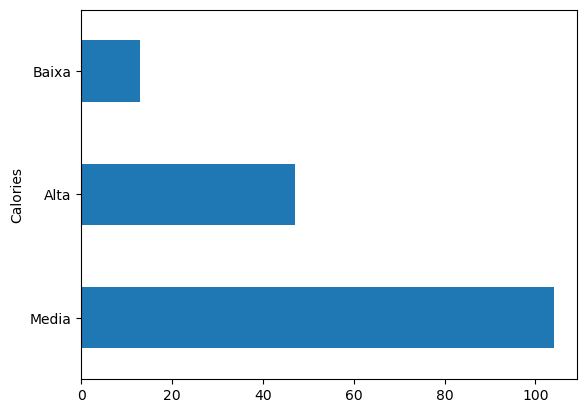

In [195]:
dados.plot.barh()

In [196]:
CalAnalise = pd.cut(
    df_data.Calories, 
    bins=[1, 150, 380, 1860.4], 
    labels=["Baixa", "Media", "Alta"]
)

In [197]:
df_data["CalAnalise"] = CalAnalise

In [199]:
df_data.tail()

,Name,Week,Duration,Pulse,Maxpulse,Calories,DMediaGeral,CalsPerMin,Datas,CalAnalise
164,Louise,8,60,105,140,290.8,-85.0,4.8,29/12/2023,Media
165,Peter,8,60,110,145,300.0,-75.8,5.0,29/12/2023,Media
166,Charles,8,60,115,145,310.2,-65.6,5.2,31/12/2023,Media
167,Louise,8,75,120,150,320.4,-55.4,4.3,29/12/2023,Media
168,Jobs,8,75,125,150,330.4,-45.4,4.4,30/12/2023,Media


In [206]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         169 non-null    object  
 1   Week         169 non-null    int64   
 2   Duration     169 non-null    int64   
 3   Pulse        169 non-null    int64   
 4   Maxpulse     169 non-null    int64   
 5   Calories     169 non-null    float64 
 6   DMediaGeral  169 non-null    float64 
 7   CalsPerMin   169 non-null    float64 
 8   Datas        169 non-null    object  
 9   CalAnalise   164 non-null    category
dtypes: category(1), float64(3), int64(4), object(2)
memory usage: 13.5+ KB


<Axes: >

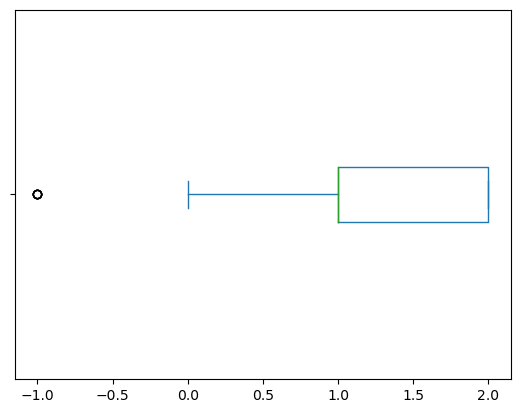

In [207]:
df_data.CalAnalise.cat.codes.plot.box(vert=False)